**Introduction**

Within this Lab we explore fundamental image processing concepts such as digital zooming and image enhancements. The effect of various digital zooming methods (nearest neighbour interpolation, bilinear interpolation, and bicubic interpolation) are compared to determine how accurate and visually pleasing their resulting images are. Additionally, image histograms are analyzed using various point transformations (negative, power-law, histogram equalization) and compared in the context of intensity distribution.

In [3]:
from skimage.color import rgb2gray
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

In [ ]:
plt.gray() # makes image plots grayscale

lena = imread('lena.tiff')
cameraman = imread('cameraman1.tif').astype(np.float64)
tire = imread('tire.tif').astype(np.float64) / 255.0


<Figure size 640x480 with 0 Axes>

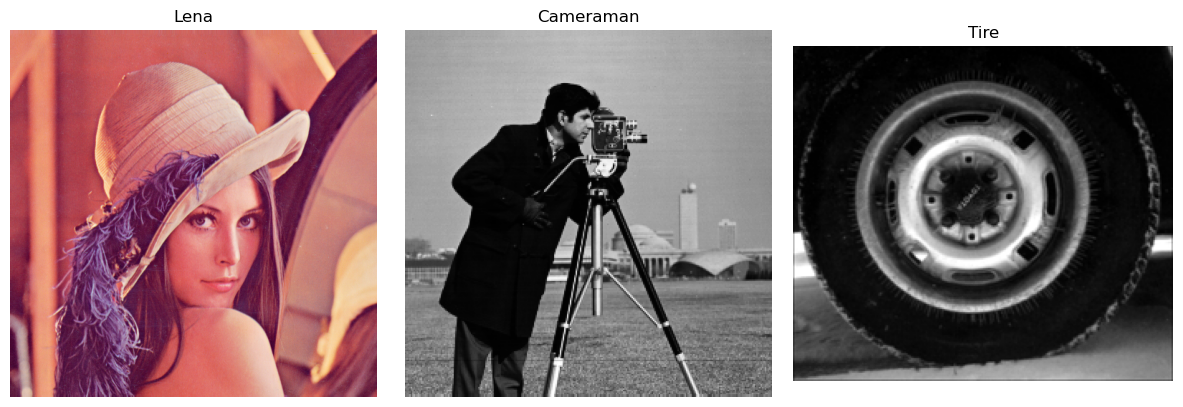

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(lena, cmap='gray')
axes[0].set_title("Lena")
axes[0].axis("off")

axes[1].imshow(cameraman, cmap='gray')
axes[1].set_title("Cameraman")
axes[1].axis("off")

axes[2].imshow(tire, cmap='gray')
axes[2].set_title("Tire")
axes[2].axis("off")

plt.tight_layout()
plt.show()

2. Image Quality Measures

In [ ]:
def PSNR(f: np.ndarray , g: np.ndarray) -> float:
    """
    Params:
        f: Reference Image
        g: Test Image
    Returns:
        PSNR_out: Peak Signal to Noise ratio output value
    """
    # Set MAX_f
    MAX_f = np.max(f)

    # convert to float 64's
    float_f = f.astype(np.float64)
    float_g = g.astype(np.float64)

    # calculate the MSE
    MSE = np.sum((float_f - float_g) ** 2) / (float_f.shape[0] * float_g.shape[1])

    # get PSNR
    PSNR_out = 10*np.log10((MAX_f**2)/MSE)
    return PSNR_out

3. Digital Zooming

(-0.5, 63.5, 63.5, -0.5)

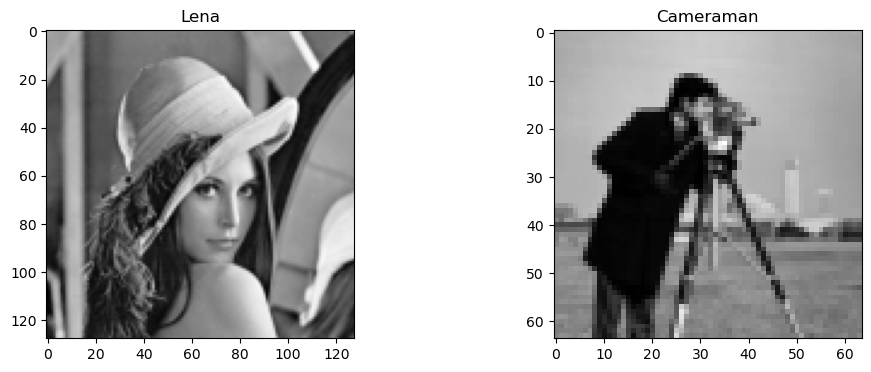

In [ ]:
# Prepare Images
lena = rgb2gray(lena)*255

lena_ds = skimage.transform.resize(lena, (lena.shape[0]/4, lena.shape[1]/4))

cameraman_ds = skimage.transform.resize(cameraman, (cameraman.shape[0]/4, cameraman.shape[1]/4))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(lena_ds, cmap='gray')
axes[0].set_title("Lena")
axes[0].axis("on")

axes[1].imshow(cameraman_ds, cmap='gray')
axes[1].set_title("Cameraman")
axes[1].axis("on")

In [ ]:
# Nearest Neighbour (resize order = 0)
lena_NN = skimage.transform.resize(lena_ds, (lena_ds.shape[0]*4, lena_ds.shape[1]*4), order=0)
cameraman_NN = skimage.transform.resize(cameraman_ds, (cameraman_ds.shape[0]*4, cameraman_ds.shape[1]*4), order=0)

# Bilinear Interpolation (resize order = 1)
lena_BLI = skimage.transform.resize(lena_ds, (lena_ds.shape[0]*4, lena_ds.shape[1]*4), order=1)
cameraman_BLI = skimage.transform.resize(cameraman_ds, (cameraman_ds.shape[0]*4, cameraman_ds.shape[1]*4), order=1)

# Bicubic Interpolation (resize order = 3)
lena_BCI = skimage.transform.resize(lena_ds, (lena_ds.shape[0]*4, lena_ds.shape[1]*4), order=3)
cameraman_BCI = skimage.transform.resize(cameraman_ds, (cameraman_ds.shape[0]*4, cameraman_ds.shape[1]*4), order=3)

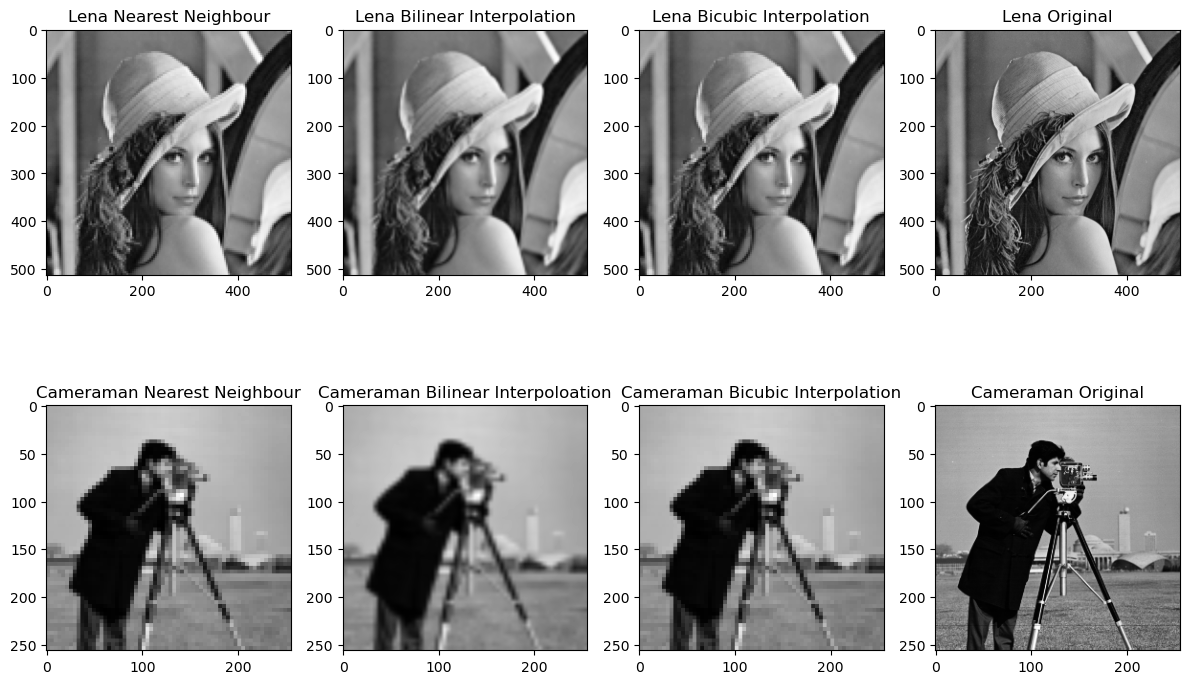

In [ ]:
# Plot
fig, axes = plt.subplots(2, 4, figsize=(12,8))

axes[0][0].imshow(lena_NN, cmap='gray')
axes[0][0].set_title("Lena Nearest Neighbour")

axes[1][0].imshow(cameraman_NN, cmap='gray')
axes[1][0].set_title("Cameraman Nearest Neighbour")

axes[0][1].imshow(lena_BLI, cmap='gray')
axes[0][1].set_title("Lena Bilinear Interpolation")

axes[1][1].imshow(cameraman_BLI, cmap='gray')
axes[1][1].set_title("Cameraman Bilinear Interpoloation")

axes[0][2].imshow(lena_NN, cmap='gray')
axes[0][2].set_title("Lena Bicubic Interpolation")

axes[1][2].imshow(cameraman_NN, cmap='gray')
axes[1][2].set_title("Cameraman Bicubic Interpolation")

axes[0][3].imshow(lena, cmap='gray')
axes[0][3].set_title("Lena Original")

axes[1][3].imshow(cameraman, cmap='gray')
axes[1][3].set_title("Cameraman Original")


fig.tight_layout()

In [ ]:
# Calculate PSNR
lena_PSNR_NN = PSNR(lena, lena_NN)
lena_PSNR_BLI = PSNR(lena, lena_BLI)
lena_PSNR_BCI = PSNR(lena, lena_BCI)

print(f"Lena PSNR's:")
print(f'Nearest Neighbour: {lena_PSNR_NN}, Bilinear Interpolation {lena_PSNR_BLI}, Bicubic Interpolation {lena_PSNR_BCI}')

cameraman_PSNR_NN = PSNR(cameraman, cameraman_NN)
cameraman_PSNR_BLI = PSNR(cameraman, cameraman_BLI)
cameraman_PSNR_BCI = PSNR(cameraman, cameraman_BCI)

print(f"Cameraman PSNR's:")
print(f'Nearest Neighbour: {cameraman_PSNR_NN}, Bilinear Interpolation {cameraman_PSNR_BLI}, Bicubic Interpolation {cameraman_PSNR_BCI}')



Lena PSNR's:
Nearest Neighbour: 26.10828112171565, Bilinear Interpolation 26.77071280346222, Bicubic Interpolation 27.83855817355626
Cameraman PSNR's:
Nearest Neighbour: 21.563236916590416, Bilinear Interpolation 21.849407629194523, Bicubic Interpolation 22.439345346187096


**1. What can you observe about the up-sampled images produced by each of the methods?**
The up-sampled images appear a lot more unclear in comparison to the original image. The nearest neighbour method produced more pixelated image, where the staircase effect is very prominent, especially in the cameraman images as the original downsized had this artifact as well. The bilinear interpolation appears smooth yet blurry, especially around edges in the images. The bicubic interpolation appears smooth and sharper for the Lena image, but quite pixelated (staircase effect) for the cameraman image.

**2. How do the different methods compare to each other in terms of PSNR as well as visual quality? Why?**

The trends for the PSNR's across the 3 method's indicate that the nearest neighbour has the worst PSNR, while the bicubic interpolation has the best. This corresponds well with the visual sharpness of the images, where nearest neighbour produces the most pixelated images, bilinear interpolation produces smooth and blurry images, and bicubic interpolation produces sharper images. The PSNR across the different methods increases with the number of neighboring pixels used in the image reconstruction. As bicubic interpolation uses the most amount of neighboring pixels it provides a more accurate reconstruction. Similarly, since the nearest neighbour method only uses one pixel for reconstruction, it has the lowest PSNR.

**3. What parts of the image seem to work well using these digital zooming methods? What parts of the image don’t? Why?**

Parts of the image that work well with these zooming methods include the smooth regions in the image, such as the woman's skin or the cameraman's jacket. These regions typically work well since the neighboring pixels within those regions don't vary greatly. On the other hand, parts of the image that did not work well include the edges and fine details in the images, such as the woman's hair or the camera tripod. These regions have varying contrast frequencies, making neighbouring pixels vary greatly.

***4. Compare the zooming results between Lena and Cameraman. Which image results in higher PSNR?***
***Which image looks better when restored to the original resolution using digital zooming methods? Why?***

Lena looks better when restored and has a higher PSNR. This is because Lena has more smooth regions, and lower contrast between regions in the image.  

***5. What does the PSNR tell you about each of the methods? Does it reflect what is observed visually?***

PSNR tells us how closely alligned two images are by comparing pixel to pixel. If two images are closely aligned, they will have a higher quantitiy of like-pixels across the two images, resulting in a higher PSNR. In relation to the three methods used, PSNR tells us that the error is highest using nearest neighbour interpolation and lowest using bicubic. This indicates that bicubic interpolation yielded an image that was most similar to the original image, on a pixel to pixel level. PSNR does not necessarily reflect what is observed visually, just how similar it is to the original. For example, within the cameraman image the bilinear interpolation was better visually, however it had a lower PSNR than the bicubic image.

4. Point Operations for Image Enhancement

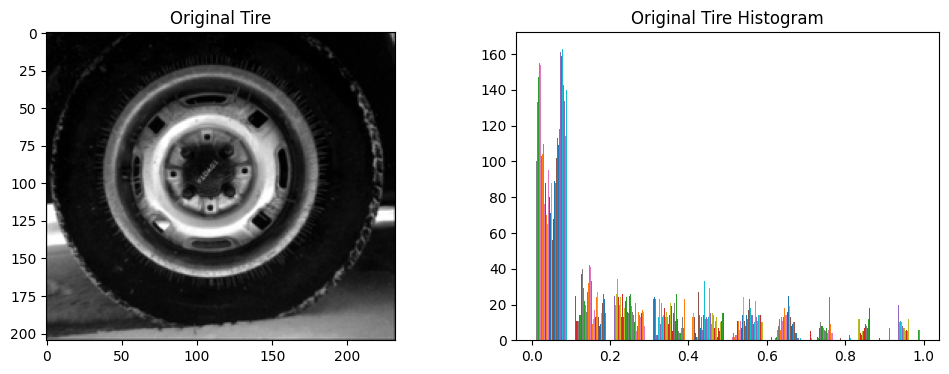

In [7]:
tire = imread('tire.tif').astype(np.float64) / 255.0
tire.flatten()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(tire, cmap='gray')
axes[0].set_title("Original Tire")
axes[1].hist(tire)
axes[1].set_title("Original Tire Histogram")

plt.show()

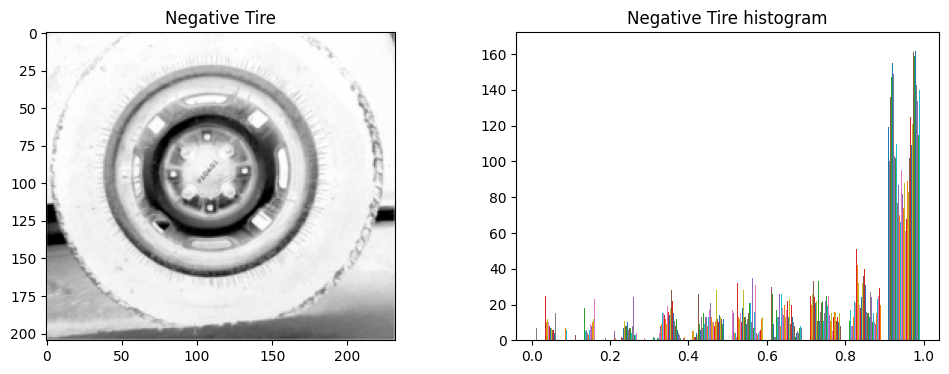

In [8]:
# Perform negative transform
from skimage import util
negative = util.invert(tire)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(negative, cmap='gray')
axes[0].set_title("Negative Tire")
axes[1].hist(negative)
axes[1].set_title("Negative Tire histogram")

plt.show()

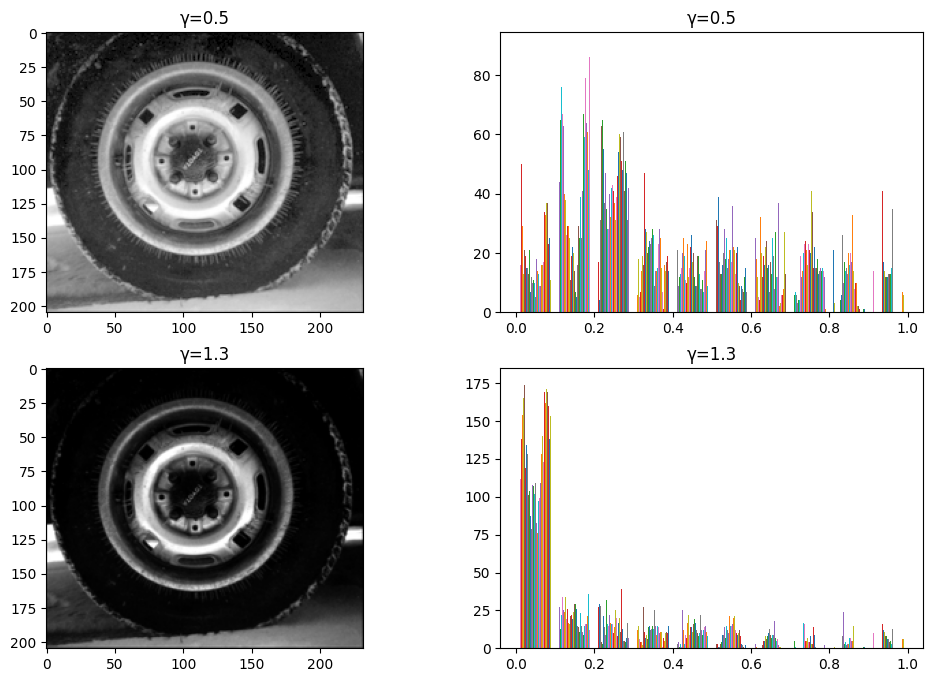

In [6]:
# Apply both power law transformations and compare
y1 = 0.5
y2 = 1.3
t_gamma1 = tire**y1
t_gamma2 = tire**y2
t_gamma1.flatten()
t_gamma2.flatten()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0][0].imshow(t_gamma1, cmap='gray')
axes[0][0].set_title("γ=0.5")
axes[0][1].hist(t_gamma1)
axes[0][1].set_title("γ=0.5")
axes[1][0].imshow(t_gamma2, cmap='gray')
axes[1][0].set_title("γ=1.3")
axes[1][1].hist(t_gamma2)
axes[1][1].set_title("γ=1.3")

plt.show()



**6. Explain what the histogram of an image represents. Why is it useful?**

The image histogram represents the quantity of pixels in the image that have each gray level across the image intensity range. The histogram is useful because it allows for quick comparison of images in terms of pixel distribution, which can reveal information about important qualities like contrast, where a correcting transformation or enhancement can then be selected.

**7. Describe how the histogram looks like in the context of intensity distribution. What does the histogram
say about the image?**

The image has a high distribution of low-intensity pixels, and a comparitively very low distribution of medium and high-intensity pixels. Based on this, the image is mostly comprised of dark pixels, but maintains high contrast because of the low (but even) spread of medium/high pixels.

**8. Describe how the histogram looks like in the context of intensity distribution. How does it differ from
the histogram of the original image? Why?**

The negative histogram has a high distribution of high-intensity pixels, and a low, but even distribution of medium/low-intensity pixels. This Differs from the original histogram in that the high-intensity and low-intensity ranges have been swapped- this histogram is a horizontally reflected version of the original. This difference is because a negative image transformation maps high intensities to low intensities, and vice versa, leading to an inversion of the distribution of pixels, and therefore an inversion of the histogram itself.

**9. Describe the appearance of the transformed images. Why do they appear this way?**

The image transformed with γ=0.5 appears to have more detail in regions that were previously darker in the original image, like the tire itself, whereas the image transformed with γ=1.3 appears to lose detail compared to the original, with most regions becoming darker/underexposed. The first image appears this way because using an exponent of γ < 1 effectively stretches the dark range of the image, leading to a brighter overall result, and more discernable features in the stretched region. Using γ > 1 does the opposite, compressing the dark range of the image, leading to a darker overall result, and less detail in the compressed region.

**10. Describe how each of the histograms look like in the context of intensity distribution. Why do they
look like this? What does each histogram say about each transformed image?**

The histogram of the γ=0.5 transformed image has a mostly even distribution of intensities, with a slightly higher distribution of dark pixels. The γ=1.3 histogram has a much higher distribution of low-intensity pixels, and a very low (but even) distribution of medium/high intensity pixels. The γ=0.5 histogram appears this way because the lower range of the image has been stretched and the higher range compressed, leading to a relatively even distribution of intensities due to the content of the original image histogram. The γ=1.3 histogram appears this way because the upper range of the image has been stretched, and the lower range compressed, leading to a much higher distribution of dark values.

**11. Compared with the original image, which of the transforms should you use to enhance the image?
Why?**

The γ=0.5 gamma correction should be used to enhance the image, as the result of the transformation has greater detail, and does not appear undersaturated when compared with the original. The original image has a high distribution of dark pixels and a low distribution of medium/high pixels. In order to get a more even distribution, the lower range must be stretched, and the higher range compressed, which is achieved using γ=0.5. Using γ=1.3 would make the image even darker, accentuating the issues already present in the intensity distribution.

***Conclusion***